In [6]:
import numpy as np
import tensorflow as  tf
from tensorflow import keras


In [7]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [23]:
X_train=X_train /255
X_test=X_test /255

In [28]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

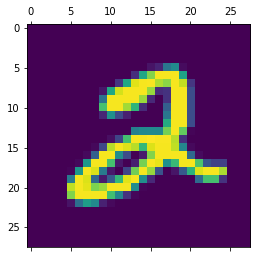

In [24]:
import matplotlib.pyplot as plt
plt.matshow(X_train[5])

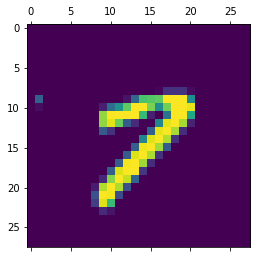

In [62]:
import matplotlib.pyplot as plt
plt.matshow(X_train[29])

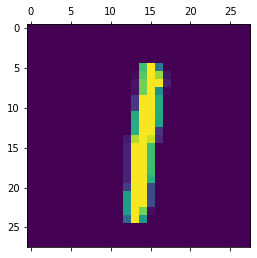

In [63]:
import matplotlib.pyplot as plt
plt.matshow(X_train[40])

In [64]:
import pandas as pd
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape



(10000, 784)

In [30]:
X_train_flattened.shape


(60000, 784)

# the use of keras by using layers 


In [31]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.4776 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.2726 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.2670 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.2615 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.2583 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 841us/step - loss: 0.2553 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.2526 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 847u

In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 600us/step - loss: 0.2619 - accuracy: 0.9281


[0.26187261939048767, 0.9280999898910522]

In [36]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 0s 499us/step


array([9.5053120e-03, 4.9118828e-08, 4.8316486e-02, 9.9009025e-01,
       4.3427474e-03, 3.7464917e-01, 7.8209368e-08, 9.9995130e-01,
       1.6248642e-01, 8.6095154e-01, 2.0448928e-07, 1.9183811e-07,
       1.4380625e-07, 3.5217661e-07, 2.7822455e-07, 9.6871766e-08,
       2.4981901e-07, 1.7534774e-07, 1.8950008e-07, 3.9428028e-07],
      dtype=float32)

In [44]:
np.argmax(y_predicted[0])


7

In [48]:
y_predicted_classes = tf.argmax(y_predicted, axis=1)  

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_classes)
print(cm)


tf.Tensor(
[[ 957    0    1    2    0    7    8    3    1    1]
 [   0 1117    3    2    0    1    4    2    6    0]
 [   5    8  940   16    9    5   12    9   25    3]
 [   2    0   21  925    1   26    2   10   17    6]
 [   1    1    4    2  929    0    9    4    8   24]
 [   7    3    3   30   12  782   14    9   26    6]
 [   9    3    7    1    7   13  914    2    2    0]
 [   1    6   26    4    7    1    0  951    1   31]
 [   6   13    7   23    9   27   10   12  856   11]
 [  10    8    1   12   34    6    0   25    3  910]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'truth')

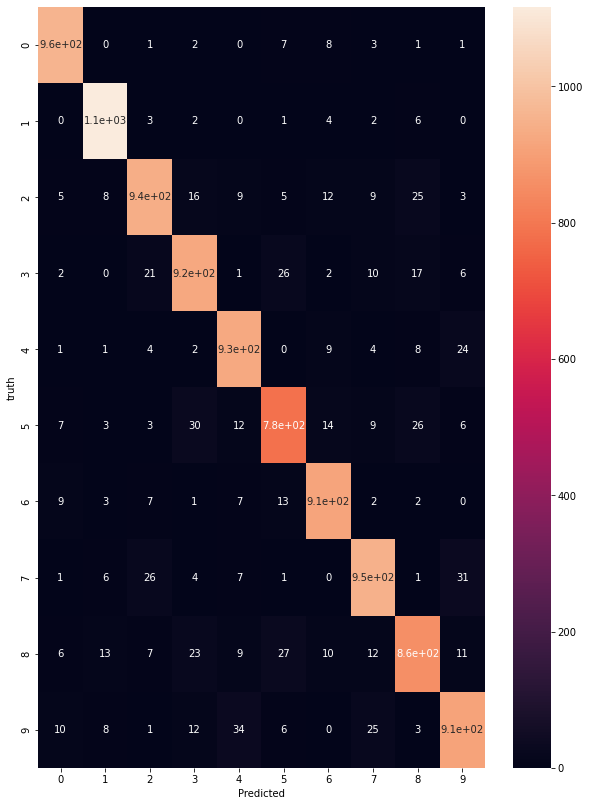

In [49]:
import seaborn as sns
plt.figure(figsize=(10,14))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [53]:
from tensorflow import keras
# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') 
])

# Compile the model
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Fit the model to the training data
model.fit(X_train_flattened, y_train, epochs=10)




Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2709 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1213 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0852 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0653 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [60]:
from tensorflow import keras
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') 
])

# Compile the model
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Fit the model to the training data
model.fit(X_train, y_train, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1222 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0862 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0430 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [61]:
print("the accuracy is:99.37%")

the accuracy is:99.37%
